# Session 03
---

## SQL with Python's SQLite3 

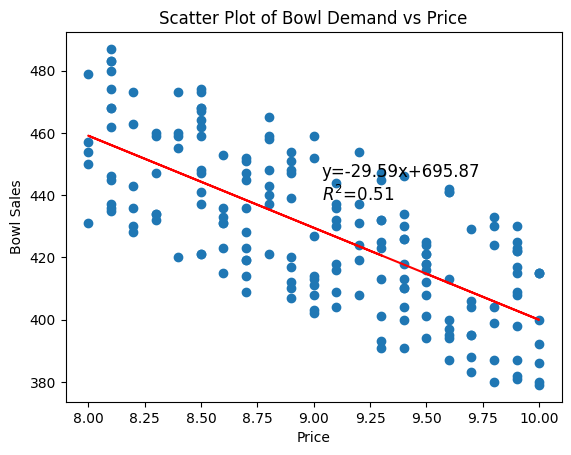

In [3]:
### Objective: Translate the Excel scatter plot creation and trendline analysis into a Python and SQLite3 application.

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

# Load data from Excel
# Ensure you adjust the sheet name and column indices as necessary to match your actual data
data = pd.read_excel('data/Maospalace.xlsx', sheet_name='data', usecols='E:F', skiprows=3, nrows=187)

# Renaming columns to match database naming conventions and avoid future errors
data.columns = ['Price', 'Bowl_Sales']

# Connect to SQLite3 database and import data
conn = sqlite3.connect('data/maospalace.db')
# If exists, replace the existing data. Ensure the column names are consistent for SQL operations.
data.to_sql('sales_data', conn, if_exists='replace', index=False)

# Query data from SQLite3 for analysis
df = pd.read_sql_query("""SELECT * FROM sales_data""", conn)

# Plotting
plt.scatter(df['Price'], df['Bowl_Sales'])
plt.title('Scatter Plot of Bowl Demand vs Price')
plt.xlabel('Price')
plt.ylabel('Bowl Sales')

# Fit a linear regression line
m, b = np.polyfit(df['Price'], df['Bowl_Sales'], 1)
# Adding a linear trendline to the scatter plot
plt.plot(df['Price'], m*df['Price'] + b, color='red')

# Calculate R-squared value for the linear regression model
r_squared = np.corrcoef(df['Price'], df['Bowl_Sales'])[0, 1]**2

# Display equation and R-squared value on the plot
# This helps in understanding the linear relationship and the goodness of fit of the model
plt.text(np.mean(df['Price']), max(df['Bowl_Sales']) * 0.9, f'y={m:.2f}x+{b:.2f}\n$R^2$={r_squared:.2f}', fontsize=12)
plt.show()

# Close the database connection to free resources
conn.close()

